# Task-3 
# PREDICTION USING UNSUPERVIZED LEARNING 
# From the given ‘Iris’ dataset, predict the optimum number of clusters and
# represented in visualization.
# DATASET IRIS
### Identifying the  following data to study:
### 1)Id having numerical values
### 2)SepalLengthCm  in centimeters
### 3)SepalWidthCm in centimeters
### 4)PetalLengthCm in centimeters
### 5)PetalLengthCm in centimeters 
### 6)PetalWidthCm in centimeters
### 7)Species having catogorial data ( setosa, versicolour and virginica ) 

In [1]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cd C:\Users\dell\Desktop\The sparks foundations\task3

C:\Users\dell\Desktop\The sparks foundations\task3


# import python libraries

In [3]:
data=pd.read_csv('Iris123.csv')

In [4]:
data.head()   # head is used to show the first five values of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()  # tail used to show the last five values of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.shape #it is used to find the no.of rows and cloumns

(150, 6)

In [7]:
data.info() # total info about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [8]:
data.isna().sum() #checking the null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
data.describe() # desciption about the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


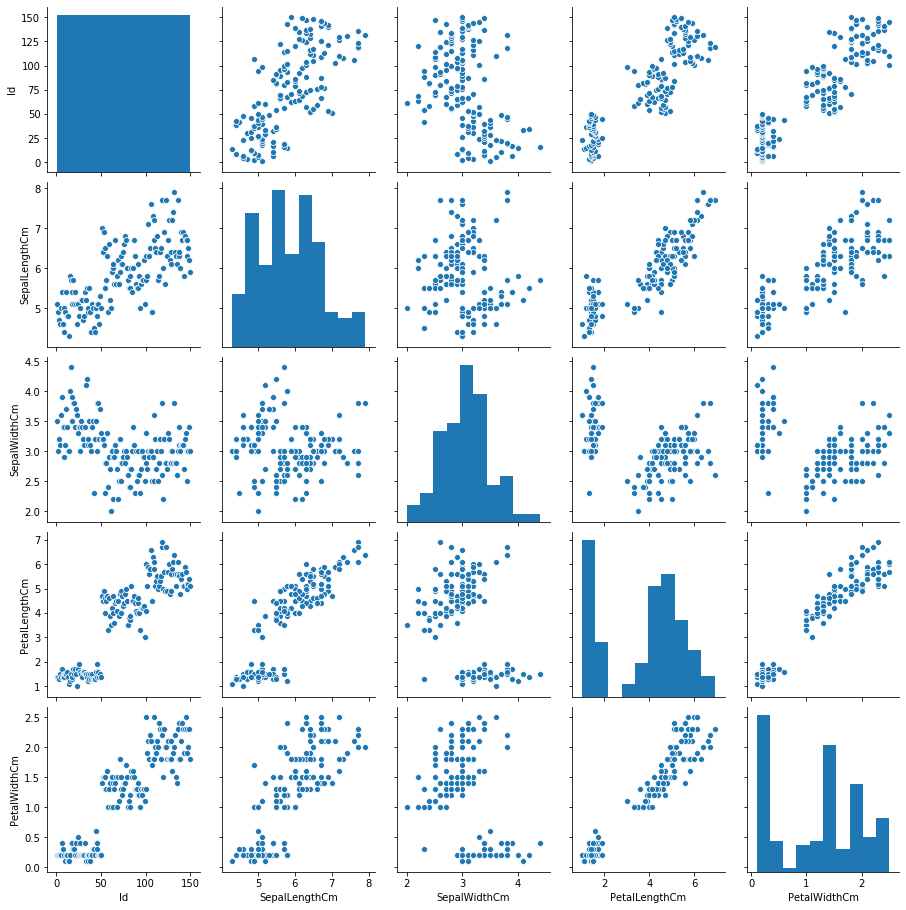

In [10]:

sns.pairplot(data)

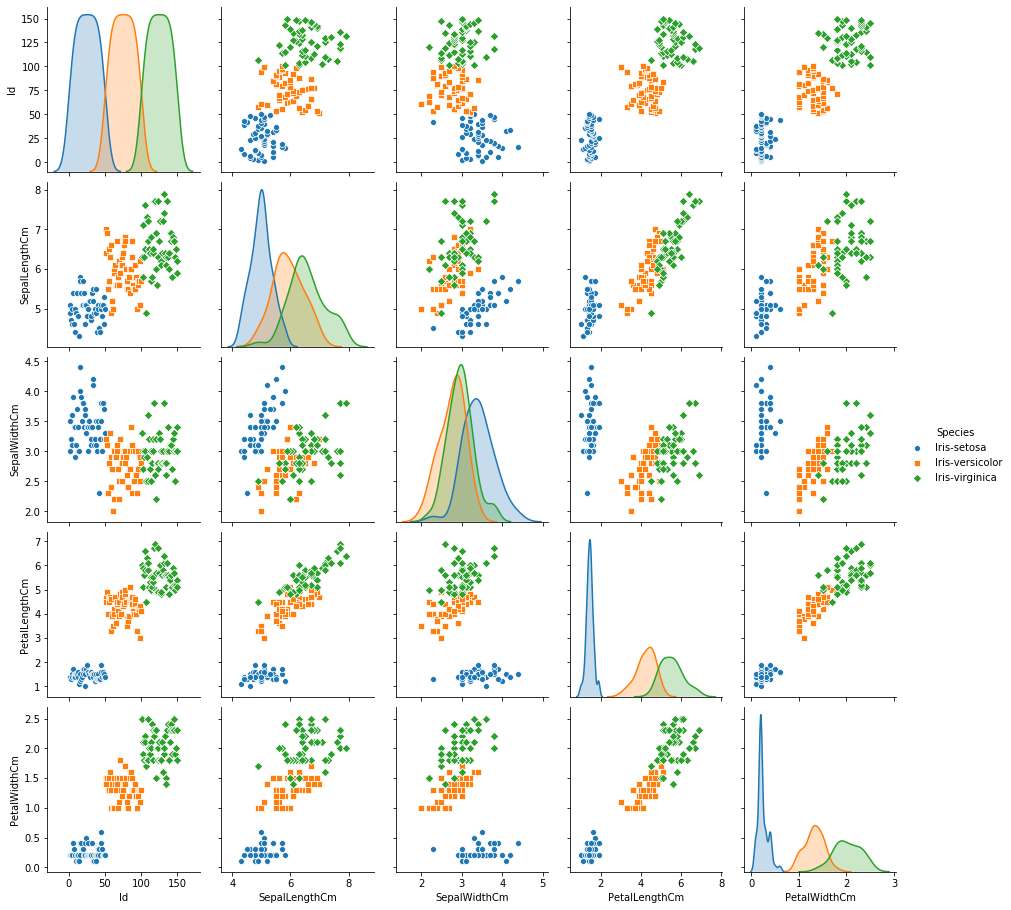

In [11]:
sns.pairplot(data,hue='Species',markers=['o','s','D'])

# Extracting X and y values 

In [12]:

x=data.iloc[:,2:4].values

In [13]:
x

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4],
       [3.9, 1.7],
       [3.4, 1.4],
       [3.4, 1.5],
       [2.9, 1.4],
       [3.1, 1.5],
       [3.7, 1.5],
       [3.4, 1.6],
       [3. , 1.4],
       [3. , 1.1],
       [4. , 1.2],
       [4.4, 1.5],
       [3.9, 1.3],
       [3.5, 1.4],
       [3.8, 1.7],
       [3.8, 1.5],
       [3.4, 1.7],
       [3.7, 1.5],
       [3.6, 1. ],
       [3.3, 1.7],
       [3.4, 1.9],
       [3. , 1.6],
       [3.4, 1.6],
       [3.5, 1.5],
       [3.4, 1.4],
       [3.2, 1.6],
       [3.1, 1.6],
       [3.4, 1.5],
       [4.1, 1.5],
       [4.2, 1.4],
       [3.1, 1.5],
       [3.2, 1.2],
       [3.5, 1.3],
       [3.1, 1.5],
       [3. , 1.3],
       [3.4, 1.5],
       [3.5, 1.3],
       [2.3, 1.3],
       [3.2, 1.3],
       [3.5, 1.6],
       [3.8, 1.9],
       [3. , 1.4],
       [3.8, 1.6],
       [3.2, 1.4],
       [3.7, 1.5],
       [3.3, 1.4],
       [3.2, 4.7],
       [3.2, 4.5],
       [3.1,

# creating elbow methods to know the clusters

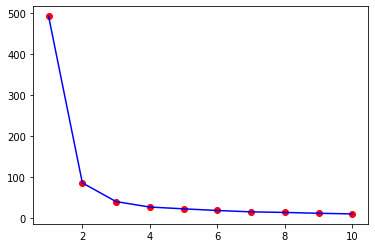

In [14]:
from sklearn.cluster import KMeans
wcss=[]                             # this list will collect the wcss values for the diffeent clusters
for i in range(1,11):
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(x)
    wcss.append(kmean.inertia_)
k=range(1,11)
plt.scatter(k,wcss,c='red')
plt.plot(k,wcss,c='blue')
plt.show()

# selected the no.of clusters 4
# predict the clusters

In [15]:

kmean=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_pred=kmean.fit_predict(x)

# prediction of the clusters

In [16]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0,
       3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3])

In [17]:
# to visualize the clusters we are going to use the y_pred values' row index
# as a reference to extract the corresponding rows from x
text=x[:,0]
text=text.reshape(150,1)

In [18]:
compare=np.append(arr=y_pred.reshape(150,1),values=text,axis=1)
print(compare)

[[1.  3.5]
 [1.  3. ]
 [1.  3.2]
 [1.  3.1]
 [1.  3.6]
 [1.  3.9]
 [1.  3.4]
 [1.  3.4]
 [1.  2.9]
 [1.  3.1]
 [1.  3.7]
 [1.  3.4]
 [1.  3. ]
 [1.  3. ]
 [1.  4. ]
 [1.  4.4]
 [1.  3.9]
 [1.  3.5]
 [1.  3.8]
 [1.  3.8]
 [1.  3.4]
 [1.  3.7]
 [1.  3.6]
 [1.  3.3]
 [1.  3.4]
 [1.  3. ]
 [1.  3.4]
 [1.  3.5]
 [1.  3.4]
 [1.  3.2]
 [1.  3.1]
 [1.  3.4]
 [1.  4.1]
 [1.  4.2]
 [1.  3.1]
 [1.  3.2]
 [1.  3.5]
 [1.  3.1]
 [1.  3. ]
 [1.  3.4]
 [1.  3.5]
 [1.  2.3]
 [1.  3.2]
 [1.  3.5]
 [1.  3.8]
 [1.  3. ]
 [1.  3.8]
 [1.  3.2]
 [1.  3.7]
 [1.  3.3]
 [3.  3.2]
 [3.  3.2]
 [3.  3.1]
 [2.  2.3]
 [3.  2.8]
 [3.  2.8]
 [3.  3.3]
 [2.  2.4]
 [3.  2.9]
 [2.  2.7]
 [2.  2. ]
 [2.  3. ]
 [2.  2.2]
 [3.  2.9]
 [2.  2.9]
 [3.  3.1]
 [3.  3. ]
 [2.  2.7]
 [2.  2.2]
 [2.  2.5]
 [3.  3.2]
 [2.  2.8]
 [3.  2.5]
 [3.  2.8]
 [2.  2.9]
 [3.  3. ]
 [3.  2.8]
 [3.  3. ]
 [3.  2.9]
 [2.  2.6]
 [2.  2.4]
 [2.  2.4]
 [2.  2.7]
 [3.  2.7]
 [3.  3. ]
 [3.  3.4]
 [3.  3.1]
 [2.  2.3]
 [2.  3. ]
 [2.  2.5]
 [2.  2.6]

In [19]:
print(x[y_pred==0,0])
print(x[y_pred==0,1])

[3.3 3.  2.9 3.  3.  2.9 2.5 3.6 3.  3.  3.8 2.6 3.2 2.8 3.3 3.2 2.8 3.
 2.8 3.8 2.8 2.6 3.  3.4 3.1 3.1 3.1 3.2 3.3 3.4]
[6.  5.9 5.6 5.8 6.6 6.3 5.8 6.1 5.5 5.5 6.7 6.9 5.7 6.7 5.7 6.  5.6 5.8
 6.1 6.4 5.6 5.6 6.1 5.6 5.5 5.4 5.6 5.9 5.7 5.4]


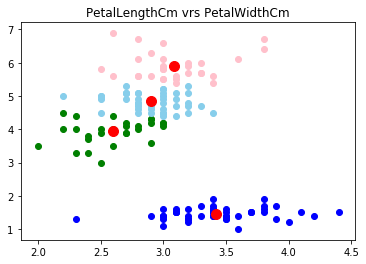

In [20]:
plt.scatter(x[y_pred == 0,0],x[y_pred == 0,1],c='pink',label = 'cluster1')
plt.scatter(x[y_pred == 1,0],x[y_pred == 1,1],c='blue',label = 'cluster2')
plt.scatter(x[y_pred == 2,0],x[y_pred == 2,1],c='green',label = 'cluster3')
plt.scatter(x[y_pred == 3,0],x[y_pred == 3,1],c='skyblue',label = 'cluster4')
# to get the centroid of the clusters we use the inbuilt clusters_centers function
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=100,c='red')
plt.title('PetalLengthCm vrs PetalWidthCm')
plt.show()

# THANK YOU